In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import numpy as np
from numpy import percentile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import binom
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
from numpy.random import rand
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
pd.set_option('display.float_format', lambda x:'%3f' %x)

In [ ]:
%matplotlib inline

In [ ]:
%cd /content/gdrive/My Drive/Colab Notebooks/


/content/gdrive/My Drive/Colab Notebooks


1.A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable

In [ ]:
telecomCustomer_df1 = pd.read_csv("TelcomCustomer-Churn_1.csv")

print("column info of dataset 1")
telecomCustomer_df1.info()
print("-------------------------------------------------")
print("rows and column size of dataset")
telecomCustomer_df1.shape

column info of dataset 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7043 non-null   object
 1   gender           7043 non-null   object
 2   SeniorCitizen    7043 non-null   int64 
 3   Partner          7043 non-null   object
 4   Dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   PhoneService     7043 non-null   object
 7   MultipleLines    7043 non-null   object
 8   InternetService  7043 non-null   object
 9   OnlineSecurity   7043 non-null   object
dtypes: int64(2), object(8)
memory usage: 550.4+ KB
-------------------------------------------------
rows and column size of dataset


(7043, 10)

1.B.Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable

In [ ]:
telecomCustomer_df2 = pd.read_csv("TelcomCustomer-Churn_2.csv")
print("column info of dataset 2")
telecomCustomer_df2.info()
print("-------------------------------------------------")
print("rows and column size of dataset")
telecomCustomer_df2.shape

column info of dataset 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   OnlineBackup      7043 non-null   object 
 2   DeviceProtection  7043 non-null   object 
 3   TechSupport       7043 non-null   object 
 4   StreamingTV       7043 non-null   object 
 5   StreamingMovies   7043 non-null   object 
 6   Contract          7043 non-null   object 
 7   PaperlessBilling  7043 non-null   object 
 8   PaymentMethod     7043 non-null   object 
 9   MonthlyCharges    7043 non-null   float64
 10  TotalCharges      7043 non-null   object 
 11  Churn             7043 non-null   object 
dtypes: float64(1), object(11)
memory usage: 660.4+ KB
-------------------------------------------------
rows and column size of dataset


(7043, 12)

1.c Merge both the DataFrames on key ‘customerID’ to form a single DataFrame

In [ ]:
merged = telecomCustomer_df1.merge(telecomCustomer_df2,on='customerID',how='outer',indicator=False)
merged.shape

(7043, 21)

In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


1.D. Data Understanding & Exploration.
. Verify if all the columns are incorporated in the merged DataFrame by using a simple comparison
Operator in Python

In [ ]:
def compare(df_a, df_b):
    orig = set(df_a.columns)
    c = set(df_b.columns)
    if orig.issubset(c):
        return ('all columns have been included')
    else:
        return ('columns from individual dataset may not have been included into merged dataset')

print("comparing telecom customer churn1 dataset with merged: ", compare(telecomCustomer_df1, merged))
print("comparing telecom customer churn2 dataset with merged: ", compare(telecomCustomer_df2, merged))


comparing telecom customer churn1 dataset with merged:  all columns have been included
comparing telecom customer churn2 dataset with merged:  all columns have been included


2.a Impute missing/unexpected values in the DataFrame

In [ ]:
for col in merged.columns:
    print(col,":", merged[col].unique())

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank tr

In [ ]:
merged = merged.replace([' '],np.nan)

In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


2.b Make sure all the variables with continuous values are of ‘Float’ type [For Example: MonthlyCharges, TotalCharges]

In [ ]:
merged.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950000,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.850000,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300000,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.700000,151.65,Yes


In [ ]:
merged['TotalCharges'].replace([' '],np.nan)

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [ ]:
merged['TotalCharges'] = merged['TotalCharges'].astype(float)

In [ ]:
merged.dropna(inplace=True)

In [ ]:
merged.drop(columns='customerID', inplace=True)

In [ ]:
merged['SeniorCitizen'] = merged['SeniorCitizen'].astype('object')

In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


2.c Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart

In [ ]:
def pie_chart_for_categorical_variables(df_pie,m):
  categorical_columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

  number_cols=m
  number_rows = len(categorical_columns) // number_cols + (len(categorical_columns) % number_cols > 0)
  #number_rows = len(categorical_columns) // number_cols

  plt.figure(figsize=(15, 12))
  plt.suptitle("Pie-Charts for Categorical Variables in the dataframe", fontsize=10, y=0.95)

  for n, col in enumerate(categorical_columns):
    ax_n = plt.subplot(number_rows, number_cols, n+1)
    df_pie.groupby(col).size().plot(kind='pie', autopct='%.2f%%', ax=ax_n, radius=1.5,textprops={'fontsize': 6})
    ax_n.set_title(col)
    plt.show()


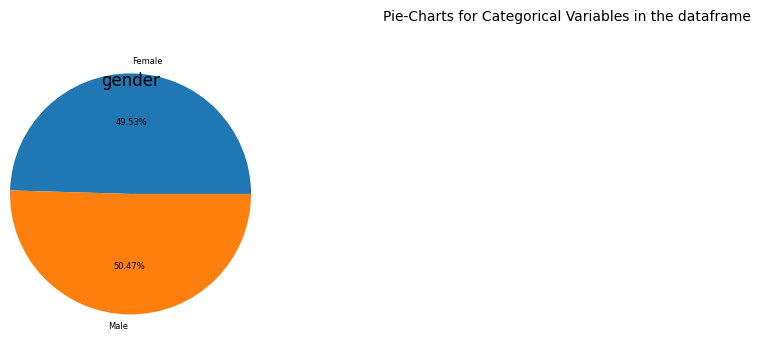

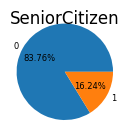

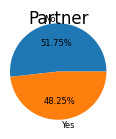

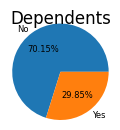

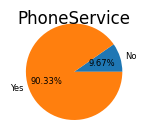

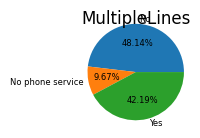

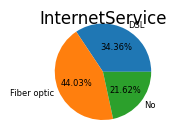

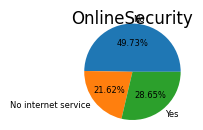

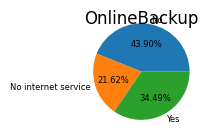

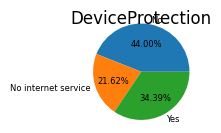

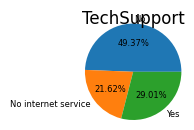

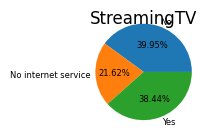

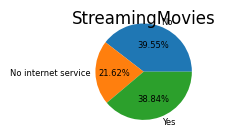

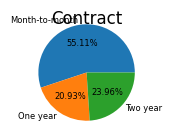

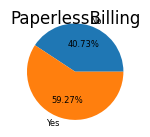

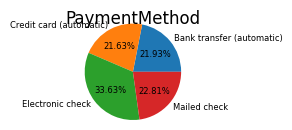

In [ ]:
pie_chart_for_categorical_variables(merged,4)

2.d Share insights for Q2.c

1) The usage by both genders is equal in terms of percentage
2) The number of senior citizens utilising the service is more
3) Most of the customers have partners
4) Most of the customers are independent
5) 90% of customers use phone service
6) Majority of customers do not have multiple lines
7) Major percentage of customers use Fiber Optic and DSL
8) Most of the customers have not opted for Online Security
9) Most of the customers have not opted for Devide Protection
10) Most of the customers have not opted for Tech Support
11) Only 40 % of customers have opted for Streaming TV & Streaming Movies
12) Maximum customers have month to month contract renewal & payment system
13) About 60% customers opt for paperless billing
14) Payment method used by various customers is different like electronic check, mailed check, bank transfer and credit card payment

2.e.Encode all the appropriate Categorical features with the best suitable approach

In [ ]:
categorical_columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
print(categorical_columns)

# label encoding for dependent variable 'Churn'
le=LabelEncoder()
encoded_variable=le.fit_transform(merged['Churn'])
merged['Churn'] = encoded_variable

#encoding for categorical columns
merged = pd.get_dummies(merged,columns=categorical_columns)
merged.head()
print(merged.dtypes)


['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_Female                                uint8
gender_Male                                  uint8
SeniorCitizen_0                              uint8
SeniorCitizen_1                              uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No             

<ipython-input-23-7e8a3dc1899e>:10: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  merged = pd.get_dummies(merged,columns=categorical_columns)


2.f Split the data into 80% train and 20% test

In [ ]:
X=merged.drop(['Churn'], axis=1)

Y=merged['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(5625, 46)
(5625,)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(1407, 46)
(1407,)


2.g Normalize/Standardize the data with the best suitable approach

Normalizing

In [ ]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

X_train_norm[['MonthlyCharges','TotalCharges']] = MinMaxScaler().fit_transform(X_train_norm[['MonthlyCharges','TotalCharges']])
X_test_norm[['MonthlyCharges','TotalCharges']] = MinMaxScaler().fit_transform(X_test_norm[['MonthlyCharges','TotalCharges']])


Standardization

In [ ]:
# data normalization with sklearn
from sklearn.preprocessing import StandardScaler

X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

num_columns=['MonthlyCharges','TotalCharges']

# apply standardization on numerical features
for i in num_columns:

    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])

    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])

    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])


3.a Train a model using Decision tree and check the performance of the model on train and test data

In [ ]:
X_train_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5625 entries, 3457 to 5165
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   5625 non-null   int64  
 1   MonthlyCharges                           5625 non-null   float64
 2   TotalCharges                             5625 non-null   float64
 3   gender_Female                            5625 non-null   uint8  
 4   gender_Male                              5625 non-null   uint8  
 5   SeniorCitizen_0                          5625 non-null   uint8  
 6   SeniorCitizen_1                          5625 non-null   uint8  
 7   Partner_No                               5625 non-null   uint8  
 8   Partner_Yes                              5625 non-null   uint8  
 9   Dependents_No                            5625 non-null   uint8  
 10  Dependents_Yes                           5625

In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 5625 entries, 3457 to 5165
Series name: Churn
Non-Null Count  Dtype
--------------  -----
5625 non-null   int64
dtypes: int64(1)
memory usage: 87.9 KB


In [ ]:
decision_model = DecisionTreeClassifier(criterion ='gini', random_state=0, max_depth=3)

decision_model.fit(X_train_norm, y_train)

y_train_predict = decision_model.predict(X_train_norm)
y_test_predict_dm = decision_model.predict(X_test_norm)

print("Decision Tree Classifier")

train_accuracy_dtr = decision_model.score(X_train_norm,y_train)
print("accuracy of training data:",train_accuracy_dtr)

test_accuracy_dtr = decision_model.score(X_test_norm,y_test)
print("accuracy of testing data:",test_accuracy_dtr)

print("Precision score for Test data", metrics.precision_score(y_test,y_test_predict_dm))
print("Precision score for Train data", metrics.precision_score(y_train,y_train_predict))

print("Recall score for Test data", metrics.recall_score(y_test,y_test_predict_dm))
print("Recall score for Test data", metrics.recall_score(y_train,y_train_predict))

print("Classification report for test")
print(metrics.classification_report(y_test, y_test_predict_dm))

print("Classification report for train")
print(metrics.classification_report(y_train, y_train_predict))


Decision Tree Classifier
accuracy of training data: 0.7909333333333334
accuracy of testing data: 0.7903340440653873
Precision score for Test data 0.6651162790697674
Precision score for Train data 0.6991473812423873
Recall score for Test data 0.3907103825136612
Recall score for Test data 0.3819028609447771
Classification report for test
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1041
           1       0.67      0.39      0.49       366

    accuracy                           0.79      1407
   macro avg       0.74      0.66      0.68      1407
weighted avg       0.77      0.79      0.77      1407

Classification report for train
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      4122
           1       0.70      0.38      0.49      1503

    accuracy                           0.79      5625
   macro avg       0.75      0.66      0.68      5625
weighted avg       0.78      0.

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

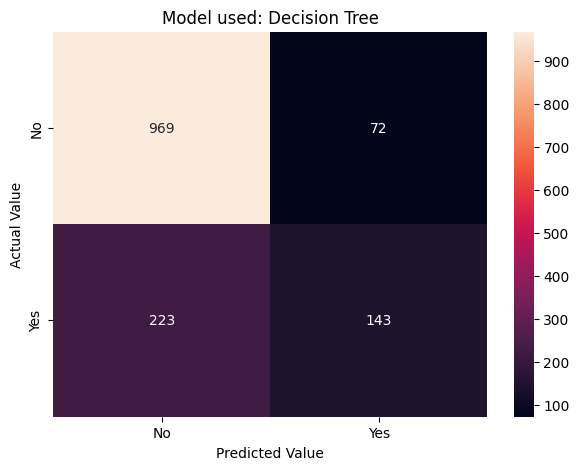

In [ ]:
cm_dm=metrics.confusion_matrix(y_test, y_test_predict_dm)
df_cm_dm = pd.DataFrame(cm_dm)

plt.figure(figsize = (7,5))
plt.title("Model used: Decision Tree")
ax1=sns.heatmap(df_cm_dm, annot=True, fmt='g')
ax1.set_xlabel('Predicted Value');
ax1.set_ylabel('Actual Value');
ax1.xaxis.set_ticklabels(['No', 'Yes'])
ax1.yaxis.set_ticklabels(['No', 'Yes'])


3.b Use grid search and improve the performance of the Decision tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.a and Q3.b

In [ ]:
decision_model_tuned = DecisionTreeClassifier()

grid_parameters_dtree = {'max_depth': [3, 4, 5, 6],
                         'max_features': ["log2","sqrt"],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter':['best','random']}

acc_scorer=metrics.make_scorer(metrics.recall_score)

grid_search_dtree = GridSearchCV(decision_model_tuned, grid_parameters_dtree, scoring=acc_scorer, cv=5)

grid_search_dtree= grid_search_dtree.fit(X_train_norm, y_train)

print(grid_search_dtree.best_params_)

best_model = grid_search_dtree.best_estimator_

print("accuracy :",grid_search_dtree.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'splitter': 'best'}
accuracy : 0.5629280177187154


              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1041
           1       0.58      0.58      0.58       366

    accuracy                           0.78      1407
   macro avg       0.71      0.72      0.71      1407
weighted avg       0.78      0.78      0.78      1407
 



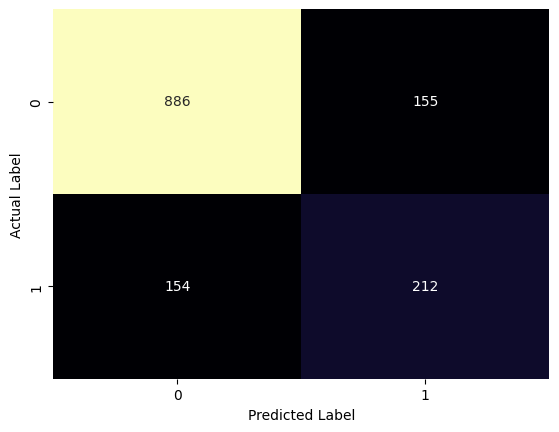

In [ ]:
y_test_predictions_gsdtc = grid_search_dtree.predict(X_test_norm)

sns.heatmap(metrics.confusion_matrix(y_test,y_test_predictions_gsdtc),annot=True,fmt='d',cbar=False,cmap='magma')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label");

#classification report for Decision Tree Classifier applying Grid search cv
print(metrics.classification_report(y_test, y_test_predictions_gsdtc),'\n')

INSIGHT:
For Decision Tree Classifier
1) Initially, the accuracy of model is good which is approximately 79% for both train and test data. However, this seems to drastically reduce after applying grid search cv. Certainly, tuning has not helped.
2) Recall has improved after applying Grid search CV, which is a good sign as model can now predict the customers churning more accurately. In this case it has increased from 38 to 58%

3.c Train a model using Random forest and check the performance of the model on train and test data

In [ ]:
random_forest_model = RandomForestClassifier(criterion ='gini', random_state=0, max_depth=3)

random_forest_model.fit(X_train_norm, y_train)

y_train_predict = random_forest_model.predict(X_train_norm)
y_test_predict_rfc = random_forest_model.predict(X_test_norm)

print("Random Forest Classifier")

train_accuracy_rfc = random_forest_model.score(X_train_norm,y_train)
print("Accuracy of training data:",train_accuracy_rfc)

test_accuracy_rfc = random_forest_model.score(X_test_norm,y_test)
print("accuracy of testing data:",test_accuracy_rfc)

print("Precision score for Test data:", metrics.precision_score(y_test,y_test_predict_rfc))
print("Precision score for Train data:", metrics.precision_score(y_train,y_train_predict))

print("Recall score for Test data:", metrics.recall_score(y_test,y_test_predict_rfc))
print("Recall score for Test data:", metrics.recall_score(y_train,y_train_predict))

print("Classification report for test")
print(metrics.classification_report(y_test, y_test_predict_rfc,zero_division=0))

print("Classification report for train")
print(metrics.classification_report(y_train, y_train_predict,zero_division=0))

Random Forest Classifier
Accuracy of training data: 0.7859555555555555
accuracy of testing data: 0.7839374555792467
Precision score for Test data: 0.7123287671232876
Precision score for Train data: 0.7430894308943089
Recall score for Test data: 0.28415300546448086
Recall score for Test data: 0.3040585495675316
Classification report for test
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      1041
           1       0.71      0.28      0.41       366

    accuracy                           0.78      1407
   macro avg       0.75      0.62      0.64      1407
weighted avg       0.77      0.78      0.75      1407

Classification report for train
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      4122
           1       0.74      0.30      0.43      1503

    accuracy                           0.79      5625
   macro avg       0.77      0.63      0.65      5625
weighted avg       0.78   

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

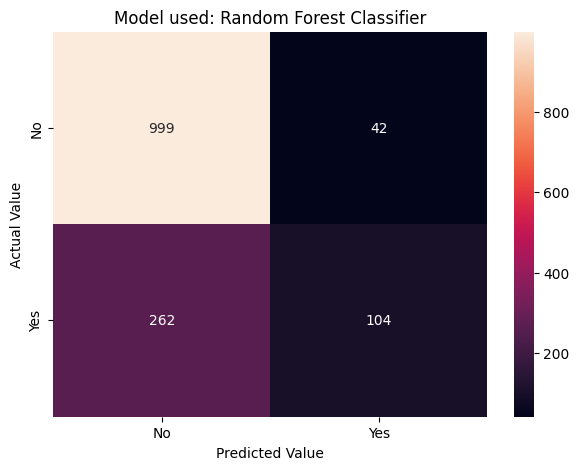

In [ ]:
cm_rfc=metrics.confusion_matrix(y_test, y_test_predict_rfc)
df_cm_rfc = pd.DataFrame(cm_rfc)

plt.figure(figsize = (7,5))
plt.title("Model used: Random Forest Classifier")
ax1=sns.heatmap(df_cm_rfc, annot=True, fmt='g')
ax1.set_xlabel('Predicted Value');
ax1.set_ylabel('Actual Value');
ax1.xaxis.set_ticklabels(['No', 'Yes'])
ax1.yaxis.set_ticklabels(['No', 'Yes'])

3.d Use grid search and improve the performance of the Random tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.c and Q3.d

In [ ]:
rf_estimator_tuned = RandomForestClassifier(random_state=1)

grid_parameters_rfc = {'n_estimators': [50, 150, 200],
                       'min_samples_leaf': np.arange(5,10),
                       'max_features': np.arange(0.2,0.7,0.1),
                       'max_samples': np.arange(0.3,0.7,0.1),
                       }

acc_scorer=metrics.make_scorer(metrics.recall_score)

random_search_rfc = RandomizedSearchCV(rf_estimator_tuned, grid_parameters_rfc, scoring=acc_scorer, cv=5)

random_search_rfc= random_search_rfc.fit(X_train_norm, y_train)

print(random_search_rfc.best_params_)

best_model_rfc = random_search_rfc.best_estimator_

print("accuracy :",random_search_rfc.best_score_)

best_model_rfc.fit(X_train_norm, y_train)

{'n_estimators': 150, 'min_samples_leaf': 8, 'max_samples': 0.6000000000000001, 'max_features': 0.30000000000000004}
accuracy : 0.5222990033222591


RandomForestClassifier(max_features=0.30000000000000004,
                       max_samples=0.6000000000000001, min_samples_leaf=8,
                       n_estimators=150, random_state=1)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1041
           1       0.66      0.49      0.56       366

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407
 



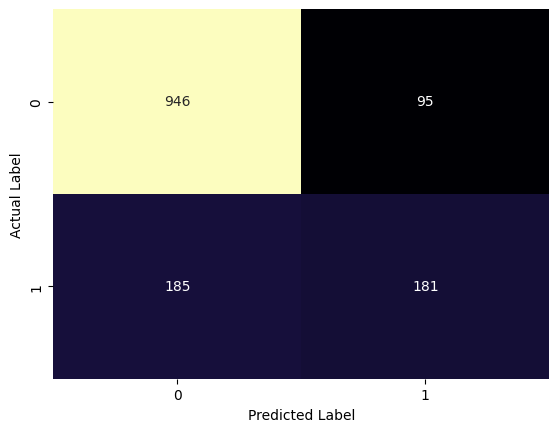

In [ ]:
y_test_predictions_gsrfc = random_search_rfc.predict(X_test_norm)

sns.heatmap(metrics.confusion_matrix(y_test,y_test_predictions_gsrfc),annot=True,fmt='d',cbar=False,cmap='magma')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label");

#classification report for Random Forest Classifier applying random search cv
print(metrics.classification_report(y_test, y_test_predictions_gsrfc),'\n')

INSIGHT:
For Random Forest Classifier
1) Initially, the accuracy of model is good which is approximately 79% for both train and test data. However, this seems to drastically reduce after applying random search cv to 52%. Certainly, tuning has not helped.
2) Recall has improved after applying Random search CV, which is a good sign as model can now predict the customers churning more accurately. In this case it has increased from 28 to 49%

3.e Train a model using Adaboost and check the performance of the model on train and test data

In [ ]:
adaboost_model = AdaBoostClassifier(n_estimators=20, learning_rate=0.3)
adaboost_model.fit(X_train_norm, y_train)

y_train_predict = adaboost_model.predict(X_train_norm)
y_test_predict_abc = adaboost_model.predict(X_test_norm)

print("AdaBoost Classifier")

train_accuracy_abc = adaboost_model.score(X_train_norm,y_train)
print("accuracy of training data:",train_accuracy_abc)

test_accuracy_abc = random_forest_model.score(X_test_norm,y_test)
print("accuracy of testing data:",test_accuracy_abc)

print("Precision score for Test data:", metrics.precision_score(y_test,y_test_predict_abc))
print("Precision score for Train data:", metrics.precision_score(y_train,y_train_predict))

print("Recall score for Test data:", metrics.recall_score(y_test,y_test_predict_abc))
print("Recall score for Test data:", metrics.recall_score(y_train,y_train_predict))

print("Classification report for test")
print(metrics.classification_report(y_test, y_test_predict_abc))

print("Classification report for train")
print(metrics.classification_report(y_train, y_train_predict))


AdaBoost Classifier
accuracy of training data: 0.7984
accuracy of testing data: 0.7839374555792467
Precision score for Test data: 0.6973180076628352
Precision score for Train data: 0.6700460829493088
Recall score for Test data: 0.4972677595628415
Recall score for Test data: 0.48369926813040587
Classification report for test
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1041
           1       0.70      0.50      0.58       366

    accuracy                           0.81      1407
   macro avg       0.77      0.71      0.73      1407
weighted avg       0.80      0.81      0.80      1407

Classification report for train
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      4122
           1       0.67      0.48      0.56      1503

    accuracy                           0.80      5625
   macro avg       0.75      0.70      0.72      5625
weighted avg       0.79      0.80      0.79

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

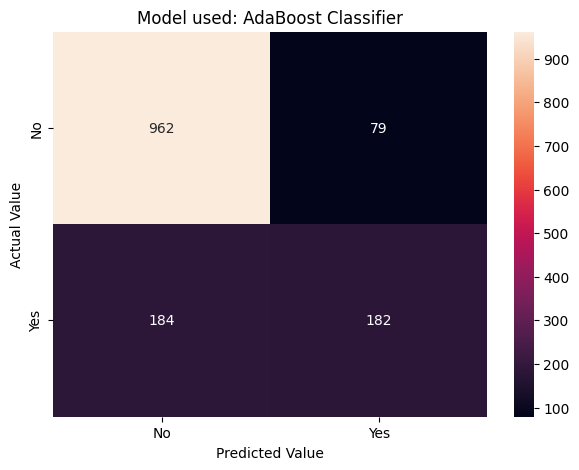

In [ ]:
cm_abc=metrics.confusion_matrix(y_test, y_test_predict_abc)
df_cm_abc = pd.DataFrame(cm_abc)

plt.figure(figsize = (7,5))
plt.title("Model used: AdaBoost Classifier")
ax1=sns.heatmap(df_cm_abc, annot=True, fmt='g')
ax1.set_xlabel('Predicted Value');
ax1.set_ylabel('Actual Value');
ax1.xaxis.set_ticklabels(['No', 'Yes'])
ax1.yaxis.set_ticklabels(['No', 'Yes'])

3.f Use grid search and improve the performance of the Adaboost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.e and Q3.f

In [ ]:
abc_estimator_tuned = AdaBoostClassifier(base_estimator = DecisionTreeClassifier())

grid_parameters_abc = {'n_estimators': [10, 50, 100, 500],
                       'learning_rate': [0.0001,0.001,0.01,0.1,1.0]
                       }

acc_scorer=metrics.make_scorer(metrics.recall_score)

grid_search_abc = RandomizedSearchCV(abc_estimator_tuned, grid_parameters_abc, n_jobs=-1, cv=5, scoring='accuracy')

grid_search_abc = grid_search_abc.fit(X_train_norm, y_train)

print(grid_search_abc.best_params_)

best_model_abc = grid_search_abc.best_estimator_

print("accuracy :",grid_search_abc.best_score_)

best_model_abc.fit(X_train_norm, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


{'n_estimators': 500, 'learning_rate': 0.01}
accuracy : 0.7479111111111111


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.01,
                   n_estimators=500)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1041
           1       0.65      0.49      0.56       366

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407
 



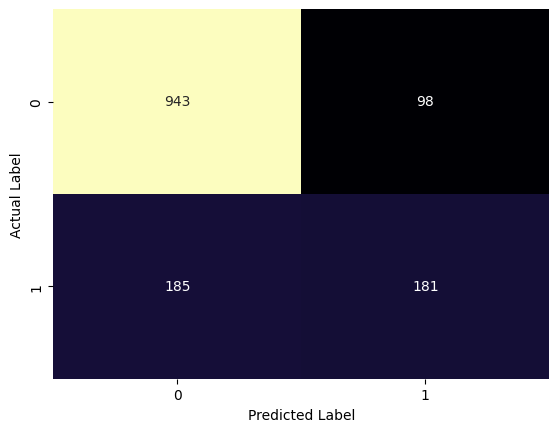

In [ ]:
y_test_predictions_gsabc = grid_search_abc.predict(X_test_norm)

sns.heatmap(metrics.confusion_matrix(y_test,y_test_predictions_gsabc),annot=True,fmt='d',cbar=False,cmap='magma')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label");

#classification report for Ada Boost Classifier applying random search cv
print(metrics.classification_report(y_test, y_test_predictions_gsabc),'\n')

INSIGHT:
For Ada Boost Classifier
1) Initially, the accuracy of model is good which is approximately 79% for both train and test data. This has remianed same after applying random search cv at 80%.
2) Recall has remained at same level of 50% after applying Random search CV
3) Both accuracy and recall have remained stagnant and tuning has certainly not been contributive

3.g Train a model using GradientBoost and check the performance of the model on train and test data

In [ ]:
gbc_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.09, max_depth=5)
gbc_model.fit(X_train_norm, y_train)

y_train_predict = gbc_model.predict(X_train_norm)
y_test_predict_gbc = gbc_model.predict(X_test_norm)

print("Gradient Boosting Classifier")

train_accuracy_gbc = gbc_model.score(X_train_norm,y_train)
print("accuracy of training data:",train_accuracy_gbc)

test_accuracy_gbc = gbc_model.score(X_test_norm,y_test)
print("accuracy of testing data:",test_accuracy_gbc)

print("Precision score for Test data:", metrics.precision_score(y_test,y_test_predict_gbc))
print("Precision score for Train data:", metrics.precision_score(y_train,y_train_predict))

print("Recall score for Test data:", metrics.recall_score(y_test,y_test_predict_gbc))
print("Recall score for Test data:", metrics.recall_score(y_train,y_train_predict))

print("Classification report for test data")
print(metrics.classification_report(y_test, y_test_predict_gbc))

print("Classification report for train data")
print(metrics.classification_report(y_train, y_train_predict))

Gradient Boosting Classifier
accuracy of training data: 0.8483555555555555
accuracy of testing data: 0.7981520966595593
Precision score for Test data: 0.6423611111111112
Precision score for Train data: 0.7699335548172758
Recall score for Test data: 0.505464480874317
Recall score for Test data: 0.6167664670658682
Classification report for test data
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.64      0.51      0.57       366

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407

Classification report for train data
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4122
           1       0.77      0.62      0.68      1503

    accuracy                           0.85      5625
   macro avg       0.82      0.77      0.79      5625
weighted avg  

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

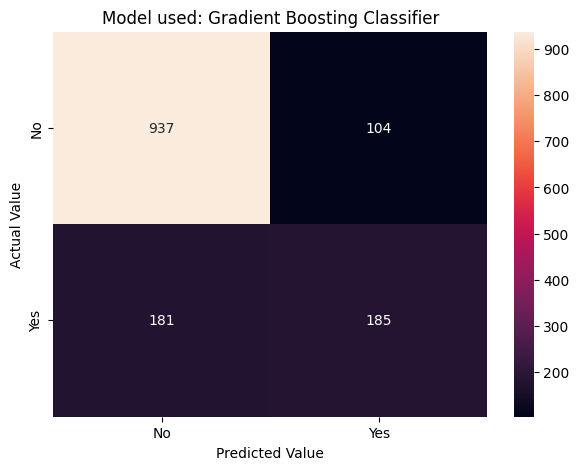

In [ ]:
cm_gbc=metrics.confusion_matrix(y_test, y_test_predict_gbc)
df_cm_gbc = pd.DataFrame(cm_gbc)

plt.figure(figsize = (7,5))
plt.title("Model used: Gradient Boosting Classifier")
ax1=sns.heatmap(df_cm_gbc, annot=True, fmt='g')
ax1.set_xlabel('Predicted Value');
ax1.set_ylabel('Actual Value');
ax1.xaxis.set_ticklabels(['No', 'Yes'])
ax1.yaxis.set_ticklabels(['No', 'Yes'])

3.h Use grid search and improve the performance of the GradientBoost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.g and Q3.h

In [ ]:
gbc_model_tuned = GradientBoostingClassifier()

grid_parameters = {'min_samples_split': [2, 3, 4, 5],
                   'max_depth': [3, 4, 5, 6],
                   'max_features': ["log2","sqrt"],
                   'n_estimators': [10, 20, 30, 40, 50,60]}

acc_scorer=metrics.make_scorer(metrics.recall_score)

grid_search = RandomizedSearchCV(gbc_model_tuned, grid_parameters, scoring=acc_scorer, cv=5)

grid_search.fit(X_train_norm, y_train)

print(grid_search.best_params_)

best_model = grid_search.best_estimator_

print("accuracy :",grid_search.best_score_)

{'n_estimators': 50, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 4}
accuracy : 0.5349590254706534


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1041
           1       0.66      0.50      0.57       366

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407
 



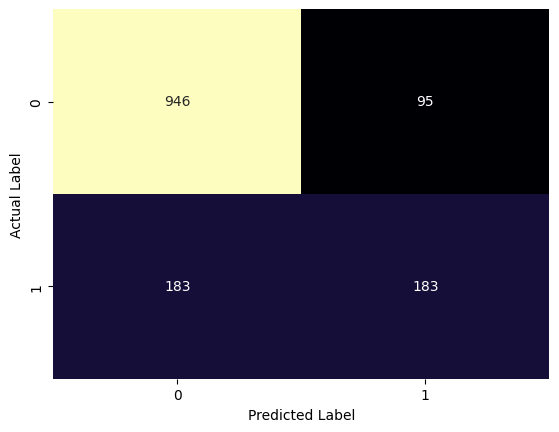

In [ ]:
y_test_predictions_gscv = grid_search.predict(X_test_norm)

sns.heatmap(metrics.confusion_matrix(y_test,y_test_predictions_gscv),annot=True,fmt='d',cbar=False,cmap='magma')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label");

#classification report for Gradient Boost Classifier applying grid search cv
print(metrics.classification_report(y_test, y_test_predictions_gscv),'\n')

print("Precision score for Test data:", metrics.precision_score(y_test,y_test_predictions_gscv))
print("Precision score for Train data:", metrics.precision_score(y_train,y_train_predict))

print("Recall score for Test data:", metrics.recall_score(y_test,y_test_predictions_gscv))
print("Recall score for Test data:", metrics.recall_score(y_train,y_train_predict))

INSIGHT: For Gradient Boost Classifier 1) Initially, the accuracy of model is good which is approximately 79-84% for both train and test data. This has dropped drastically to 53%. 2) Recall has remained at same level of 50% after applying Random search CV 3) Both parameters accuracy & recall have not improved by tuning

3.i Provide detailed analysis of the below steps 1) Compare the performance of each model in train stage and test stage 2) Provide your observation on which model performed the best 3) Provide your reasoning on why the model performed best 4) Provide your final conclusion on your observation

**Decision Tree Classifier**
accuracy of training data: 0.7909333333333334
accuracy of testing data: 0.7903340440653873
Precision score for Test data 0.6651162790697674
Precision score for Train data 0.6991473812423873
Recall score for Test data 0.3907103825136612
Recall score for Test data 0.3819028609447771

Tuned
Accuracy on train data : 0.5629280177187154

**Random Forest Classifier**
Accuracy of training data: 0.7859555555555555
accuracy of testing data: 0.7839374555792467
Precision score for Test data: 0.7123287671232876
Precision score for Train data: 0.7430894308943089
Recall score for Test data: 0.28415300546448086
Recall score for Test data: 0.3040585495675316

Tuned
Accuracy on train data : 0.5222990033222591

**AdaBoost Classifier**
accuracy of training data: 0.7984
accuracy of testing data: 0.7839374555792467
Precision score for Test data: 0.6973180076628352
Precision score for Train data: 0.6700460829493088
Recall score for Test data: 0.4972677595628415
Recall score for Test data: 0.48369926813040587

Tuned
Accuracy on train data : 0.7479111111111111

**Gradient Boosting Classifier**
accuracy of training data: 0.8483555555555555
accuracy of testing data: 0.7981520966595593
Precision score for Test data: 0.6423611111111112
Precision score for Train data: 0.7699335548172758
Recall score for Test data: 0.505464480874317
Recall score for Test data: 0.6167664670658682

Tuned
Accuracy on train data : 0.5349590254706534



1) As we can see above that all models have high accuracy, but they reduced after tuning. The only model which maintained accuracy is AdaBoost Classifier.
2) The recall rate is better in Gradient Boosting rather than AdaBoost Classifier. The recall rate for Decision Tree and Random Forest is very low,indicating that loosing client rate is not captured very well.
3) Accuracy of testing data is par for all models
4) Accuracy of training data is best for Gradient Boosting Classifier

**Gradient Boosting Clasifier** is the best model as it exhibits high accuracy and recall. It does not require tuning as that has not contributed much


In [32]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [26]:
! pwd

/content


In [30]:
%%shell
jupyter nbconvert --to html --template lab /Project_Ensemble_Techniques.ipynb
#The %%shell lets the interpreter know that the following script is interpreted as shell. Don't write anything before %%shell, use a distinct cell for this.

#The form of /PATH/TO/YOUR/NOTEBOOKFILE.ipynb will be something like /content/lightaberration3.ipynb.

[NbConvertApp] WARNING | pattern '/Project_Ensemble_Techniques.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=Tr

CalledProcessError: ignored

In [19]:
%%javascript
IPython.notebook.save_notebook()


<IPython.core.display.Javascript object>

In [20]:
import os
os.system('jupyter nbconvert --to html Project_Ensemble_Techniques.ipynb')

65280